# Project Topic: Online News Popularity Social Media (Mashable) Data evaluation
##### Group No.: Group 22
##### Group Members: Xu Yongyi, Zhang Zhanbo, Deng Mengda, Chen Fangmei


## Data Resources
Online News Popularity Data Set   
https://www.kaggle.com/datasets/sunita15/social-media-dataset?select=574_Cert_Proj_dataset_desc.txt


## Main Target
Exploratory analysis and describe observations on the relationship between **number of shares** and other related attributes, specifically:
1. with
- word count: including the number of words in the title/content, rate of unique words/unique non-stop words in the content
- article published date: article published on Monday/Tuesday/…/the weekend?
- other: including the number of links, videos and images

2. with subjectivity and polarity
- channel type: the article is in channel 'Lifestyle'/ 'Entertainment' / 'Business' / 'Social Media' / 'Tech' / 'World'
- subjective: text/ title subjectivity, absolute subjectivity level
- polarity: text/ title sentiment polarity


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For file uploading
import requests
from io import BytesIO

In [3]:
%matplotlib inline

# 1. Data Loading

In [4]:
response = requests.get('https://drive.google.com/uc?id=1BOCPd_ifBNwogwi7DRvj5guUyH_JMIdd&export=download')
content = response.content

data = pd.read_csv(BytesIO(content))

In [5]:
# drop attributes
data = data.drop(columns=['timedelta', 'n_non_stop_words', 'average_token_length', 'num_keywords',
                          'global_rate_positive_words', 'global_rate_negative_words','num_self_hrefs',
                          'weekday_is_saturday', 'weekday_is_sunday',
                          'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                          'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',
                          'min_positive_polarity', 'max_positive_polarity', 'min_negative_polarity', 'max_negative_polarity','abs_title_subjectivity', 'abs_title_sentiment_polarity',
                          'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'])

In [6]:
data.shape

(39644, 29)

In [7]:
data.columns

Index(['url', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_imgs', 'num_videos',
       'data_channel_is_lifestyle', ' data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'global_subjectivity', 'global_sentiment_polarity',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

Attributes:
1. url: URL of the article
---
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
---
6. num_hrefs: Number of links
7. num_imgs: Number of images
8. num_videos: Number of videos
---
9. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
10. data_channel_is_entertainment: Is data channel 'Entertainment'?
11. data_channel_is_bus: Is data channel 'Business'?
12. data_channel_is_socmed: Is data channel 'Social Media'?
13. data_channel_is_tech: Is data channel 'Tech'?
14. data_channel_is_world: Is data channel 'World'?
---
15. weekday_is_monday: Was the article published on a Monday?
16. weekday_is_tuesday: Was the article published on a Tuesday?
17. weekday_is_wednesday: Was the article published on a Wednesday?
18. weekday_is_thursday: Was the article published on a Thursday?
19. weekday_is_friday: Was the article published on a Friday?
20. is_weekend: Was the article published on the weekend?
---
21. global_subjectivity: Text subjectivity
22. global_sentiment_polarity: Text sentiment polarity
23. rate_positive_words: Rate of positive words
24. rate_negative_words: Rate of negative words
25. avg_positive_polarity: Avg. polarity of positive words
26. avg_negative_polarity: Avg. polarity of negative words
---
27. title_subjectivity: Title subjectivity
28. title_sentiment_polarity: Title polarity
---
29. shares: Number of shares (target)

# 2. Data Preprocessing/Transformation

In [8]:
data.rename(columns={' data_channel_is_entertainment': 'data_channel_is_entertainment'}, inplace=True)

In [9]:
data.isnull().sum()

url                              0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_imgs                         0
num_videos                       0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
weekday_is_monday                0
weekday_is_tuesday               0
weekday_is_wednesday             0
weekday_is_thursday              0
weekday_is_friday                0
is_weekend                       0
global_subjectivity              0
global_sentiment_polarity        0
rate_positive_words              0
rate_negative_words              0
avg_positive_polarity            0
avg_negative_polarity            0
title_subjectivity               0
title_sentiment_polarity         0
shares              

In [10]:
data.duplicated().sum()

0

# 3. Exploratory Data Analysis

## 1. Univariate Analysis

                      




### 1.1 Categorical Features

#### 1.1.1 Publish days of the week




C:\Users\stdke\AppData\Local\Temp\ipykernel_27524\3022015425.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Days of the Week", y="Volume Counts for Days", data=post_data, palette='rainbow')


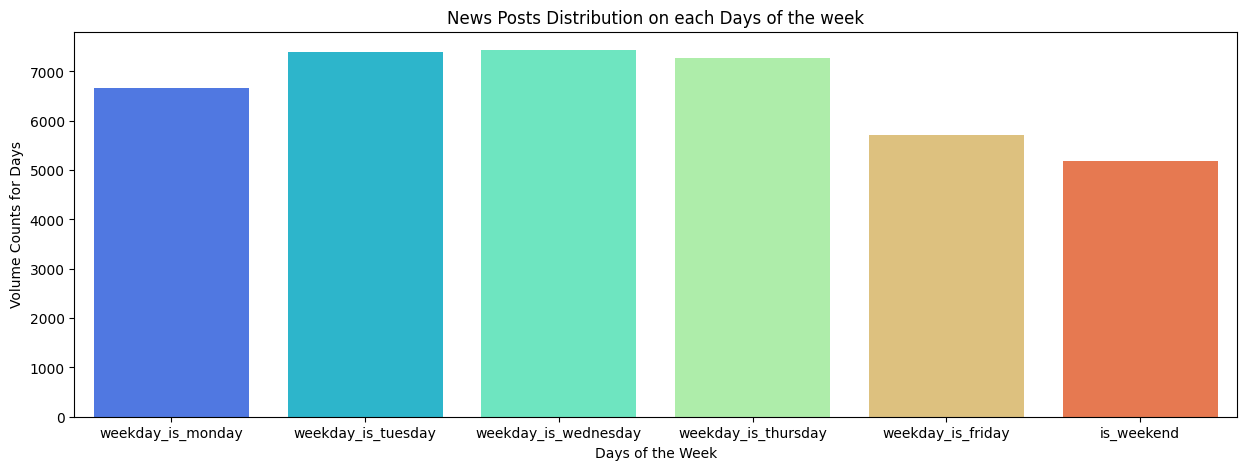

In [11]:
categorical_cols=['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','is_weekend']
df_weekday = pd.DataFrame(data, columns= categorical_cols)
melted_df_weekday = pd.melt(df_weekday, var_name='Days of the Week', value_name='Volume Counts for Days')
Sum_df = melted_df_weekday.groupby(['Days of the Week']).sum()
new_index = categorical_cols
post_data=Sum_df.reindex(new_index).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x="Days of the Week", y="Volume Counts for Days", data=post_data, palette='rainbow')
plt.title('News Posts Distribution on each Days of the week')
plt.show()

#### 1.1.2 Type of Channels

C:\Users\stdke\AppData\Local\Temp\ipykernel_27524\101775413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Channel", y="Volume Counts for Channels", data=channel_data, palette='rainbow')


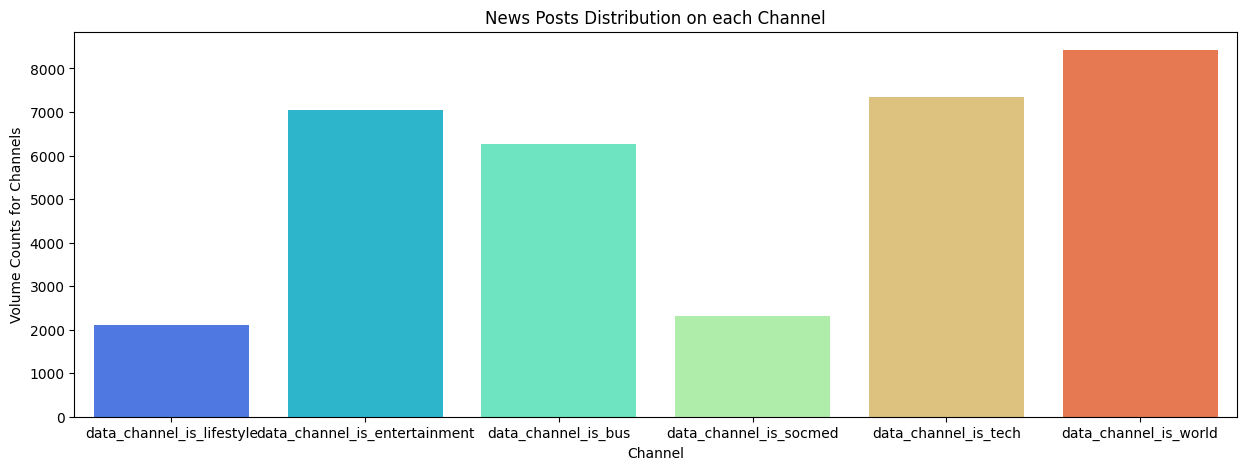

In [12]:
categorical_cols2=['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']
df_channel = pd.DataFrame(data, columns= categorical_cols2)
melted_df_channel = pd.melt(df_channel, var_name='Channel', value_name='Volume Counts for Channels')
Sum_df_channel = melted_df_channel.groupby('Channel').sum()
new_index2 = categorical_cols2
channel_data=Sum_df_channel.reindex(new_index2).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x="Channel", y="Volume Counts for Channels", data=channel_data, palette='rainbow')
plt.title('News Posts Distribution on each Channel')
plt.show()

### 1.2 Numerical Features


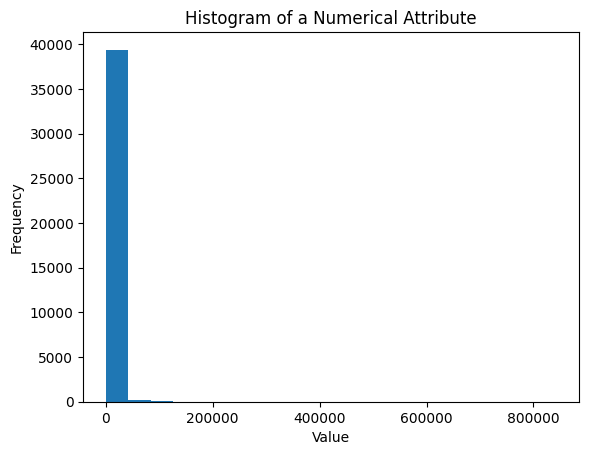

In [13]:
plt.hist(data['shares'], bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of a Numerical Attribute')
plt.show()

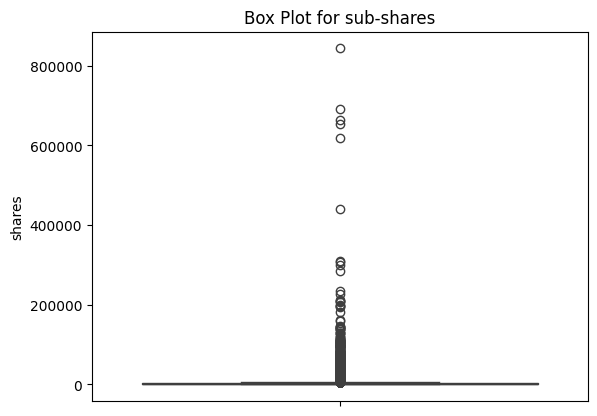

In [14]:
sns.boxplot(data['shares'])
plt.title('Box Plot for sub-shares')
plt.show()

In [15]:
data['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [16]:
# Handling outliers
mean = data['shares'].mean()
std = data['shares'].std()
threshold = 3
data['z_score'] = (data['shares'] - mean) / std
data_no_outliers = data[abs(data['z_score']) <= threshold]

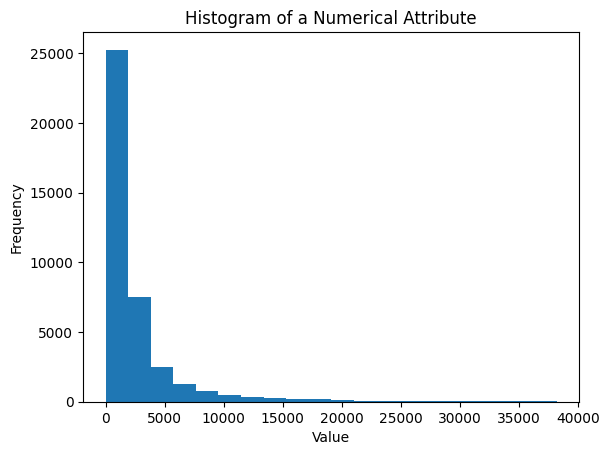

In [17]:
plt.hist(data_no_outliers['shares'], bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of a Numerical Attribute')
plt.show()

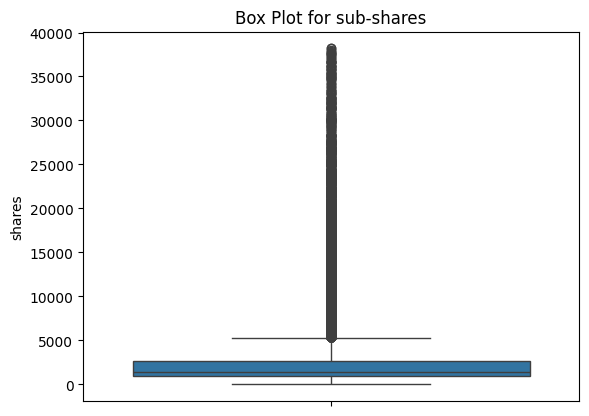

In [18]:
sns.boxplot(data_no_outliers['shares'])
plt.title('Box Plot for sub-shares')
plt.show()

In [19]:
data_no_outliers['shares'].describe()

count    39336.000000
mean      2755.416260
std       3949.651794
min          1.000000
25%        942.000000
50%       1400.000000
75%       2700.000000
max      38200.000000
Name: shares, dtype: float64

Analysis, S. (2023) What are the advantages and disadvantages of using polarity and subjectivity scores?, Polarity and Subjectivity Scores for Sentiment Analysis. Available at: https://www.linkedin.com/advice/3/what-advantages-disadvantages-using-polarity (Accessed: 18 November 2023).

C:\Users\stdke\AppData\Local\Temp\ipykernel_27524\2760691600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_outliers['global_sentiment_polarity'])
C:\Users\stdke\AppData\Local\Temp\ipykernel_27524\2760691600.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_outliers['globa

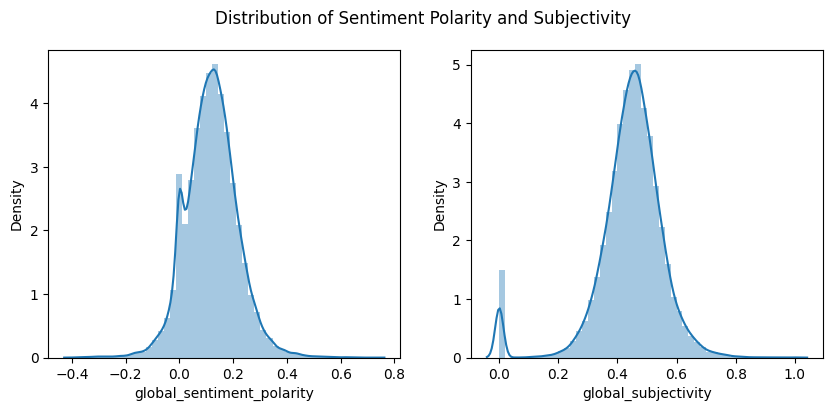

In [20]:
plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(data_no_outliers['global_sentiment_polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data_no_outliers['global_subjectivity'])

plt.suptitle('Distribution of Sentiment Polarity and Subjectivity')
plt.show()

## 2. Bivariate Analysis




### Sections:  
### Numerical Features:  
1. Number of words in title/content vs Number of shares
2. Percentage of unique words vs Number of shares
3. Number of links vs Number of shares
4. Number of images/videos vs Number of shares

### Sentiment polarity vs Number of shares  

### Numerical Features:

#### 1. Number of words in title/content vs Number of shares  

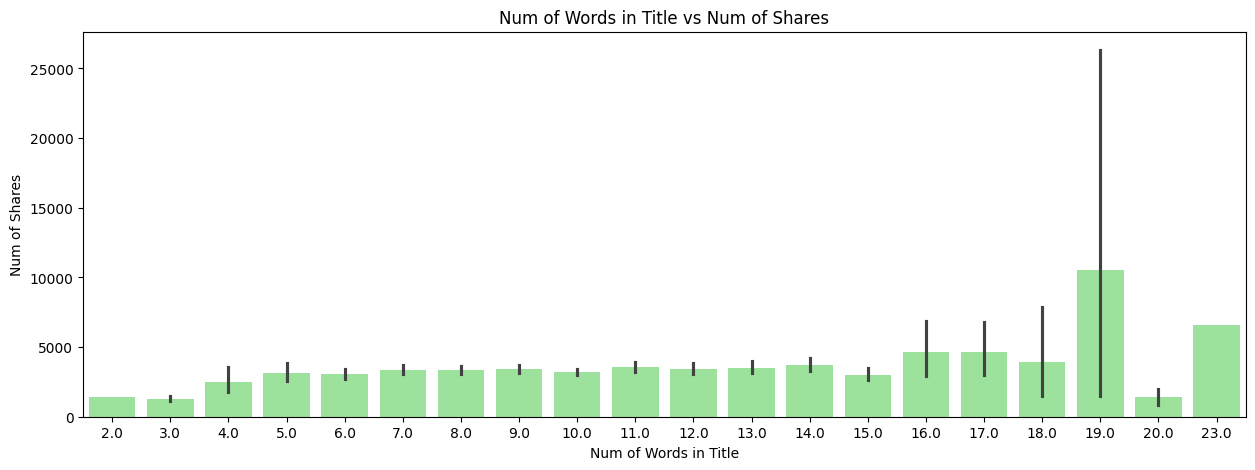

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(data = data, x='n_tokens_title', y = 'shares',color='lightgreen')
plt.title('Num of Words in Title vs Num of Shares')
plt.xlabel('Num of Words in Title')
plt.ylabel('Num of Shares')
plt.show()

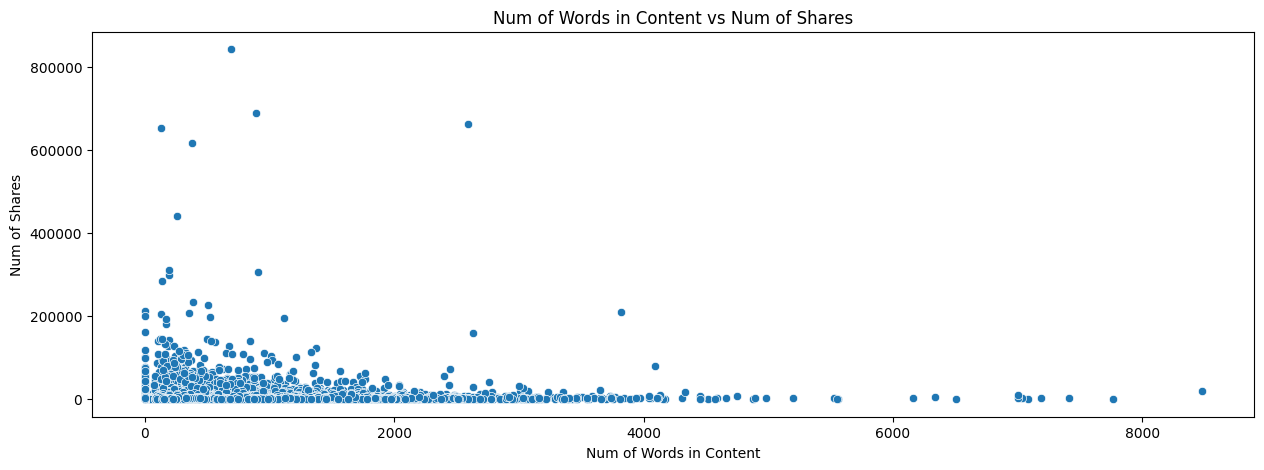

In [22]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = data, x=data['n_tokens_content'], y = data['shares'])
plt.title('Num of Words in Content vs Num of Shares')
plt.xlabel('Num of Words in Content')
plt.ylabel('Num of Shares')
plt.show()

In [23]:
filter = data['n_unique_tokens']<=1
filtered_data_1= data[filter]
filtered_data_1.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,global_subjectivity,global_sentiment_polarity,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,shares,z_score
count,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,...,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000
mean,10.398784,546.488914,0.530547,0.672796,10.883687,4.542971,1.249905,0.052948,0.177989,0.157859,...,0.443381,0.119312,0.682167,0.287941,0.353834,-0.259531,0.282360,0.071427,3395.317004,-0.000005
std,2.114052,471.085404,0.137112,0.154035,11.332160,8.306262,4.107902,0.223932,0.382508,0.364613,...,0.116665,0.096930,0.190178,0.156151,0.104528,0.127721,0.324248,0.265453,11627.090592,1.000012
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.393750,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,-0.291941
25%,9.000000,246.000000,0.470867,0.625733,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.396173,0.057762,0.600000,0.185185,0.306249,-0.328384,0.000000,0.000000,946.000000,-0.210664
50%,10.000000,409.000000,0.539216,0.690476,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.453458,0.119119,0.710526,0.280000,0.358760,-0.253333,0.150000,0.000000,1400.000000,-0.171617
75%,12.000000,716.000000,0.608696,0.754624,14.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,0.508333,0.177835,0.800000,0.384615,0.411428,-0.186905,0.500000,0.150000,2800.000000,-0.051207
max,23.000000,8474.000000,1.000000,1.000000,304.000000,128.000000,91.000000,1.000000,1.000000,1.000000,...,1.000000,0.727841,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,843300.000000,72.237738


In [24]:
filter2 = filtered_data_1['n_tokens_content']<=4000
filtered_data_2 = filtered_data_1[filter2]
filter3 = filtered_data_2['shares']<=200000
filtered_data_3 = filtered_data_2[filter3]
filtered_data_3.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,global_subjectivity,global_sentiment_polarity,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,shares,z_score
count,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,...,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000
mean,10.397666,541.705300,0.530827,0.673065,10.866847,4.516041,1.249356,0.052796,0.177992,0.157783,...,0.443362,0.119293,0.682149,0.287966,0.353827,-0.259477,0.282361,0.071377,3227.309655,-0.014455
std,2.113228,445.078958,0.136884,0.153846,11.292824,8.159138,4.108936,0.223630,0.382511,0.364542,...,0.116684,0.096949,0.190219,0.156215,0.104545,0.127744,0.324285,0.265450,7255.785984,0.624049
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.393750,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,-0.291941
25%,9.000000,246.000000,0.471077,0.625979,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.396112,0.057734,0.600000,0.185185,0.306204,-0.328330,0.000000,0.000000,945.000000,-0.210750
50%,10.000000,409.000000,0.539352,0.690612,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.453402,0.119097,0.710526,0.280000,0.358730,-0.253333,0.150000,0.000000,1400.000000,-0.171617
75%,12.000000,714.000000,0.608696,0.754717,14.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,0.508333,0.177804,0.800000,0.384615,0.411429,-0.186738,0.500000,0.148504,2800.000000,-0.051207
max,23.000000,3974.000000,1.000000,1.000000,304.000000,100.000000,91.000000,1.000000,1.000000,1.000000,...,1.000000,0.727841,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,197600.000000,16.702971


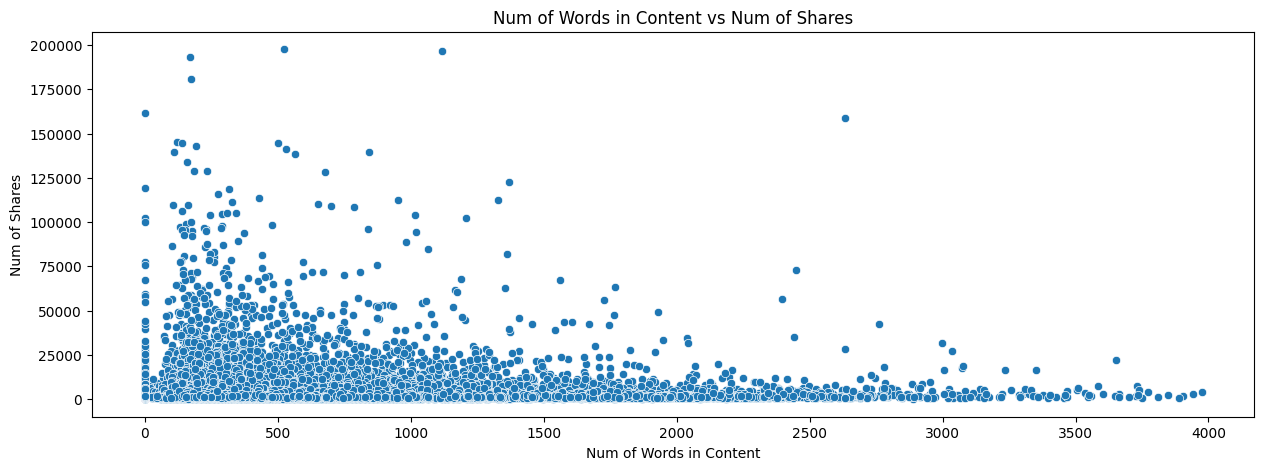

In [25]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = filtered_data_3, x=filtered_data_3['n_tokens_content'], y = filtered_data_3['shares'])
plt.title('Num of Words in Content vs Num of Shares')
plt.xlabel('Num of Words in Content')
plt.ylabel('Num of Shares')
plt.show()

#### 2. Percentage of unique words vs Number of shares  

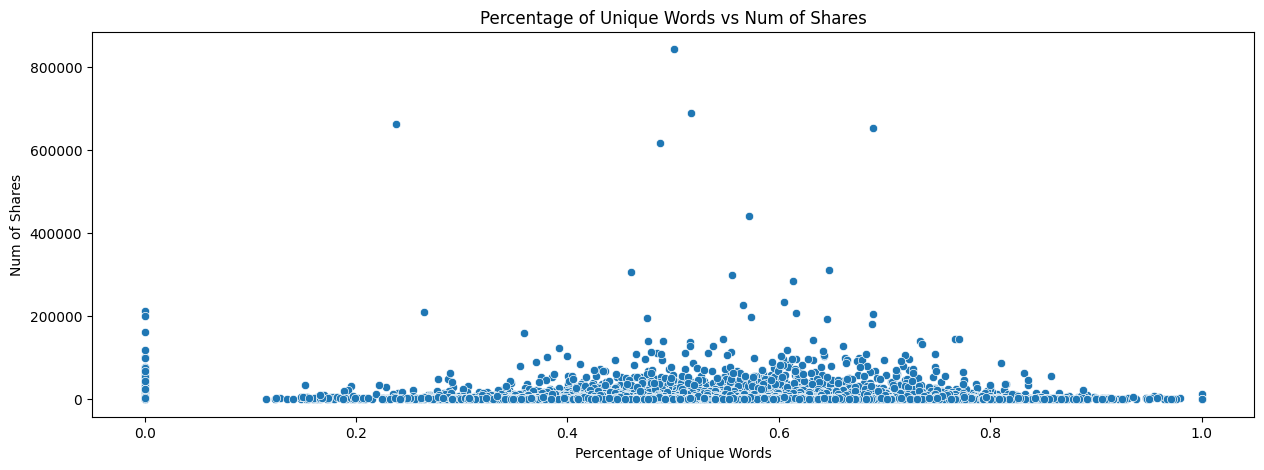

In [26]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = filtered_data_1, x= filtered_data_1['n_unique_tokens'], y = filtered_data_1['shares'])
plt.title('Percentage of Unique Words vs Num of Shares')
plt.xlabel('Percentage of Unique Words')
plt.ylabel('Num of Shares')
plt.show()

#### 3. Number of links vs Number of shares

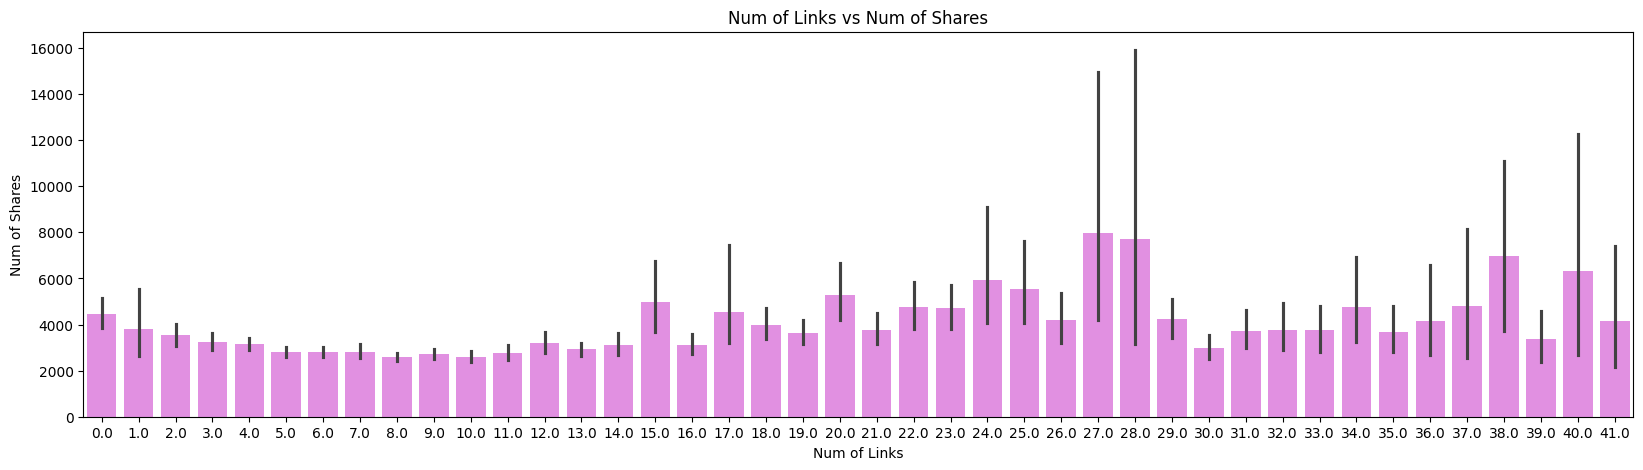

In [27]:
z_score_href = (filtered_data_1['num_hrefs'] - filtered_data_1['num_hrefs'].median()) / filtered_data_1['num_hrefs'].std()
outliers_href = z_score_href.abs() > 3
filtered_href = filtered_data_1[~outliers_href]
filtered_href
plt.figure(figsize=(20,5))
sns.barplot(data = filtered_href, x= filtered_href['num_hrefs'], y = filtered_href['shares'],color='violet')
plt.title('Num of Links vs Num of Shares')
plt.xlabel('Num of Links')
plt.ylabel('Num of Shares')
plt.show()

### 4. Number of images/videos vs Number of shares  

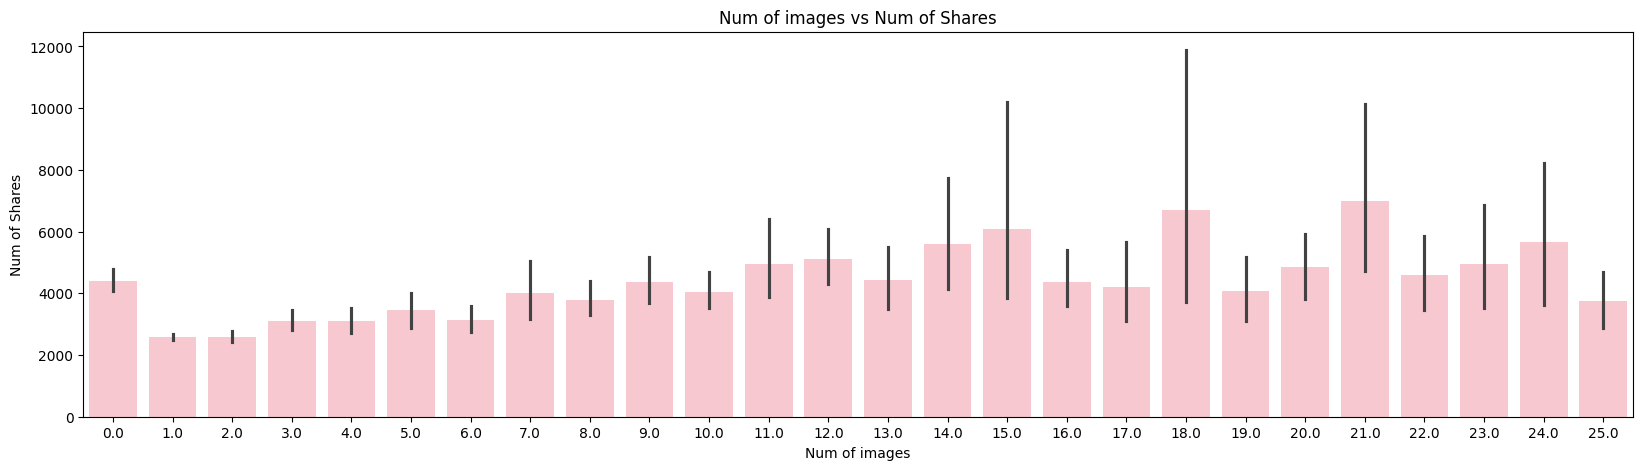

In [28]:
z_score_imgs = (filtered_data_1['num_imgs'] - filtered_data_1['num_imgs'].median()) / filtered_data_1['num_imgs'].std()
outliers_imgs = z_score_imgs.abs() > 3
filtered_imgs = filtered_data_1[~outliers_imgs]
filtered_imgs
plt.figure(figsize=(20,5))
sns.barplot(data = filtered_imgs, x= filtered_imgs['num_imgs'], y = filtered_imgs['shares'],color='pink')
plt.title('Num of images vs Num of Shares')
plt.xlabel('Num of images')
plt.ylabel('Num of Shares')
plt.show()

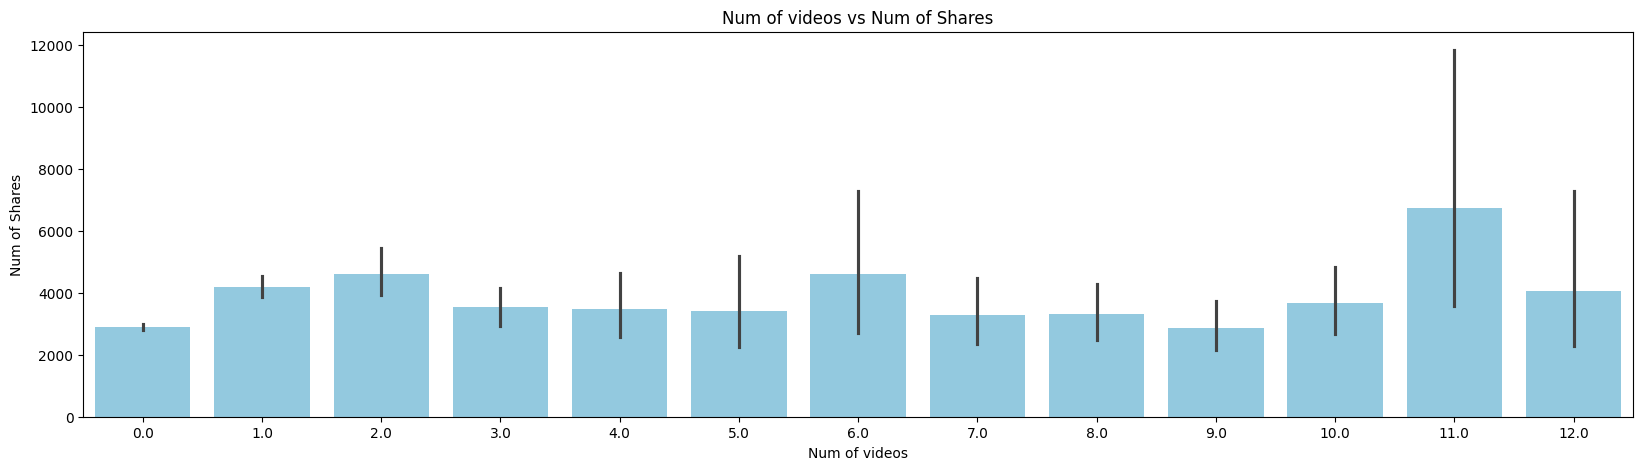

In [29]:
z_score_videos = (filtered_data_1['num_videos'] - filtered_data_1['num_videos'].median()) / filtered_data_1['num_videos'].std()
outliers_videos = z_score_videos.abs() > 3
filtered_videos = filtered_data_1[~outliers_videos]
filtered_videos
plt.figure(figsize=(20,5))
sns.barplot(data = filtered_videos, x= filtered_videos['num_videos'], y = filtered_videos['shares'],color='skyblue')
plt.title('Num of videos vs Num of Shares')
plt.xlabel('Num of videos')
plt.ylabel('Num of Shares')
plt.show()

### Sentiment polarity, Subjectivity & Number of shares

In [30]:
bivariate = data_no_outliers.drop(['z_score'], axis=1)

In [31]:
bivariate.columns

Index(['url', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_imgs', 'num_videos',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'global_subjectivity', 'global_sentiment_polarity',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [32]:
bivariate_df = bivariate.iloc[:, [0]+list(range(8, 14))+ list(range(20, bivariate.shape[1]))]
bivariate_df.head()

,url,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,0.0,1.0,0.0,0.0,0.0,0.0,0.521617,0.092562,0.769231,0.230769,0.378636,-0.350000,0.500000,-0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,0.0,0.0,1.0,0.0,0.0,0.0,0.341246,0.148948,0.733333,0.266667,0.286915,-0.118750,0.000000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,0.0,0.0,1.0,0.0,0.0,0.0,0.702222,0.323333,0.857143,0.142857,0.495833,-0.466667,0.000000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,0.0,1.0,0.0,0.0,0.0,0.0,0.429850,0.100705,0.666667,0.333333,0.385965,-0.369697,0.000000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,0.0,0.0,0.0,0.0,1.0,0.0,0.513502,0.281003,0.860215,0.139785,0.411127,-0.220192,0.454545,0.136364,505


In [33]:
bivariate_df.columns

Index(['url', 'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'global_subjectivity',
       'global_sentiment_polarity', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
       'title_subjectivity', 'title_sentiment_polarity', 'shares'],
      dtype='object')

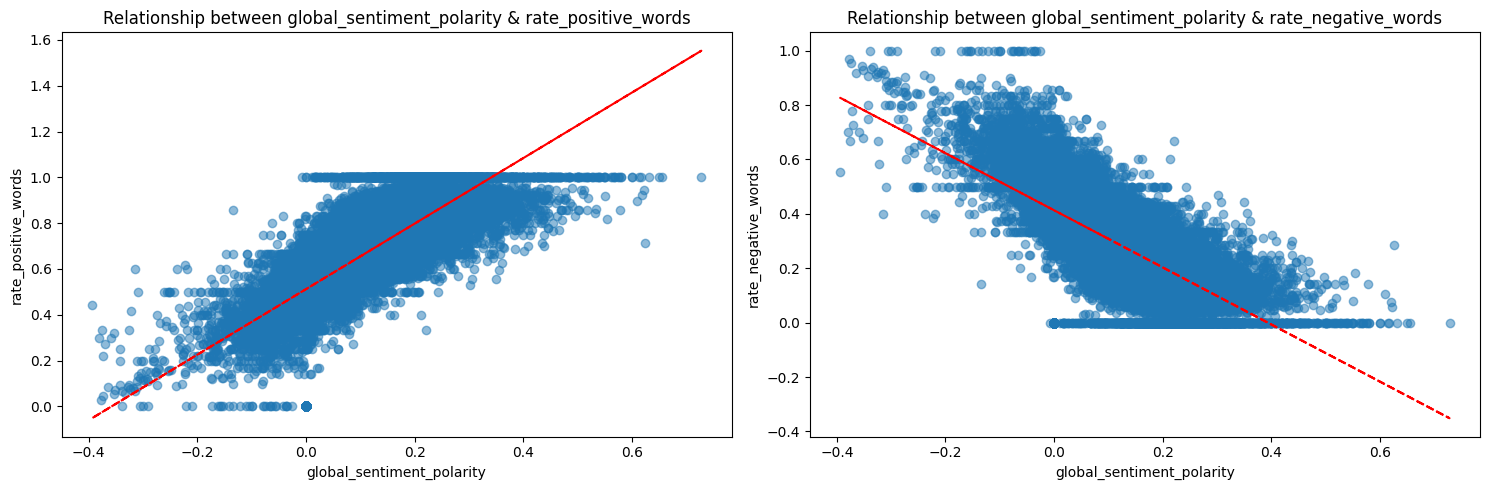

In [34]:
# Scatter plot for 'global_sentiment_polarity' and 'global_rate_negative_words'
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(bivariate_df['global_sentiment_polarity'], bivariate_df['rate_positive_words'], alpha=0.5)
plt.title('Relationship between global_sentiment_polarity & rate_positive_words')
plt.xlabel('global_sentiment_polarity')
plt.ylabel('rate_positive_words')

# Add a line of best fit
z = np.polyfit(bivariate_df['global_sentiment_polarity'], bivariate_df['rate_positive_words'], 1)
p = np.poly1d(z)
plt.plot(bivariate_df['global_sentiment_polarity'], p(bivariate_df['global_sentiment_polarity']), 'r--')

# Scatter plot for 'global_sentiment_polarity' and 'global_rate_negative_words'
plt.subplot(1, 2, 2)
plt.scatter(bivariate_df['global_sentiment_polarity'], bivariate_df['rate_negative_words'], alpha=0.5)
plt.title('Relationship between global_sentiment_polarity & rate_negative_words')
plt.xlabel('global_sentiment_polarity')
plt.ylabel('rate_negative_words')

# Add a line of best fit
z = np.polyfit(bivariate_df['global_sentiment_polarity'], bivariate_df['rate_negative_words'], 1)
p = np.poly1d(z)
plt.plot(bivariate_df['global_sentiment_polarity'], p(bivariate_df['global_sentiment_polarity']), 'r--')

plt.tight_layout()
plt.show()

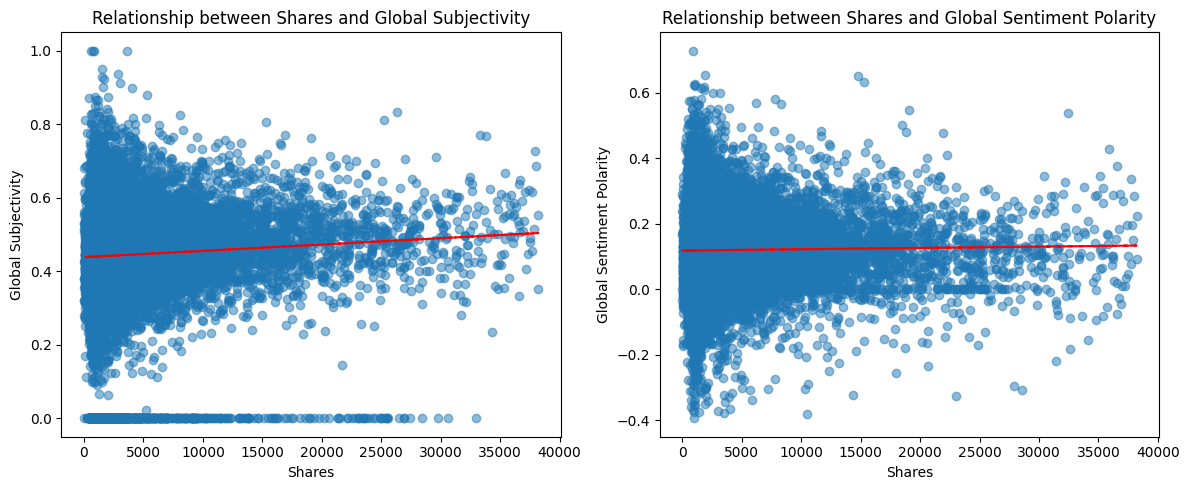

In [35]:
# Scatter plot for 'shares' and 'global_subjectivity'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(bivariate_df['shares'], bivariate_df['global_subjectivity'], alpha=0.5)
plt.title('Relationship between Shares and Global Subjectivity')
plt.xlabel('Shares')
plt.ylabel('Global Subjectivity')

# Add a line of best fit
z = np.polyfit(bivariate_df['shares'], bivariate_df['global_subjectivity'], 1)
p = np.poly1d(z)
plt.plot(bivariate_df['shares'], p(bivariate_df['shares']), 'r--')

# Scatter plot for 'shares' and 'global_sentiment_polarity'
plt.subplot(1, 2, 2)
plt.scatter(bivariate_df['shares'], bivariate_df['global_sentiment_polarity'], alpha=0.5)
plt.title('Relationship between Shares and Global Sentiment Polarity')
plt.xlabel('Shares')
plt.ylabel('Global Sentiment Polarity')

# Add a line of best fit
z = np.polyfit(bivariate_df['shares'], bivariate_df['global_sentiment_polarity'], 1)
p = np.poly1d(z)
plt.plot(bivariate_df['shares'], p(bivariate_df['shares']), 'r--')

plt.tight_layout()
plt.show()

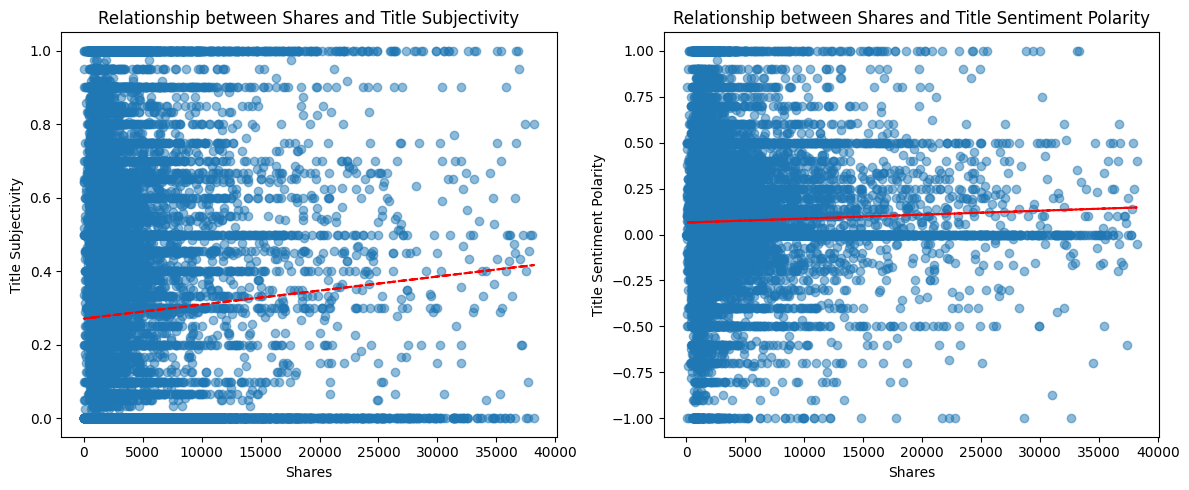

In [36]:
# Scatter plot for 'shares' and 'title_subjectivity'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(bivariate_df['shares'], bivariate_df['title_subjectivity'], alpha=0.5)
plt.title('Relationship between Shares and Title Subjectivity')
plt.xlabel('Shares')
plt.ylabel('Title Subjectivity')

# Add a line of best fit
z = np.polyfit(bivariate_df['shares'], bivariate_df['title_subjectivity'], 1)
p = np.poly1d(z)
plt.plot(bivariate_df['shares'], p(bivariate_df['shares']), 'r--')

# Scatter plot for 'shares' and 'title_sentiment_polarity'
plt.subplot(1, 2, 2)
plt.scatter(bivariate_df['shares'], bivariate_df['title_sentiment_polarity'], alpha=0.5)
plt.title('Relationship between Shares and Title Sentiment Polarity')
plt.xlabel('Shares')
plt.ylabel('Title Sentiment Polarity')

# Add a line of best fit
z = np.polyfit(bivariate_df['shares'], bivariate_df['title_sentiment_polarity'], 1)
p = np.poly1d(z)
plt.plot(bivariate_df['shares'], p(bivariate_df['shares']), 'r--')

plt.tight_layout()
plt.show()

In [37]:
selected_columns = ['global_sentiment_polarity', 'global_subjectivity', 'shares',
                     'data_channel_is_lifestyle', 'data_channel_is_entertainment',
                     'data_channel_is_bus', 'data_channel_is_socmed',
                     'data_channel_is_tech', 'data_channel_is_world']
channel_df = bivariate_df[selected_columns].copy()
channel_df['channel_type'] = bivariate_df[['data_channel_is_lifestyle', 'data_channel_is_entertainment',
                                          'data_channel_is_bus', 'data_channel_is_socmed',
                                          'data_channel_is_tech', 'data_channel_is_world']].idxmax(axis=1)

In [38]:
channel_types = channel_df['channel_type'].unique()

In [39]:
channel_df.head()

,global_sentiment_polarity,global_subjectivity,shares,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,channel_type
0,0.092562,0.521617,593,0.0,1.0,0.0,0.0,0.0,0.0,data_channel_is_entertainment
1,0.148948,0.341246,711,0.0,0.0,1.0,0.0,0.0,0.0,data_channel_is_bus
2,0.323333,0.702222,1500,0.0,0.0,1.0,0.0,0.0,0.0,data_channel_is_bus
3,0.100705,0.429850,1200,0.0,1.0,0.0,0.0,0.0,0.0,data_channel_is_entertainment
4,0.281003,0.513502,505,0.0,0.0,0.0,0.0,1.0,0.0,data_channel_is_tech


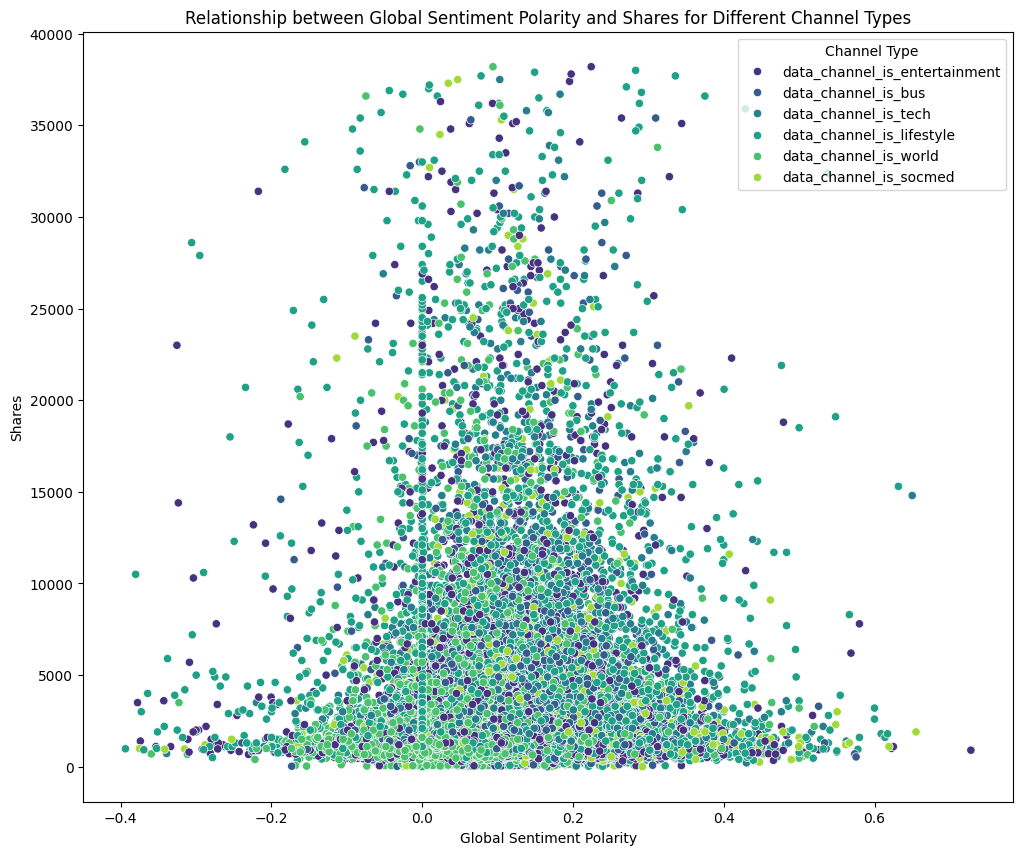

In [40]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='global_sentiment_polarity', y='shares', hue='channel_type', data=channel_df, palette='viridis', alpha=1)
plt.title('Relationship between Global Sentiment Polarity and Shares for Different Channel Types')
plt.xlabel('Global Sentiment Polarity')
plt.ylabel('Shares')
plt.legend(title='Channel Type')
plt.show()

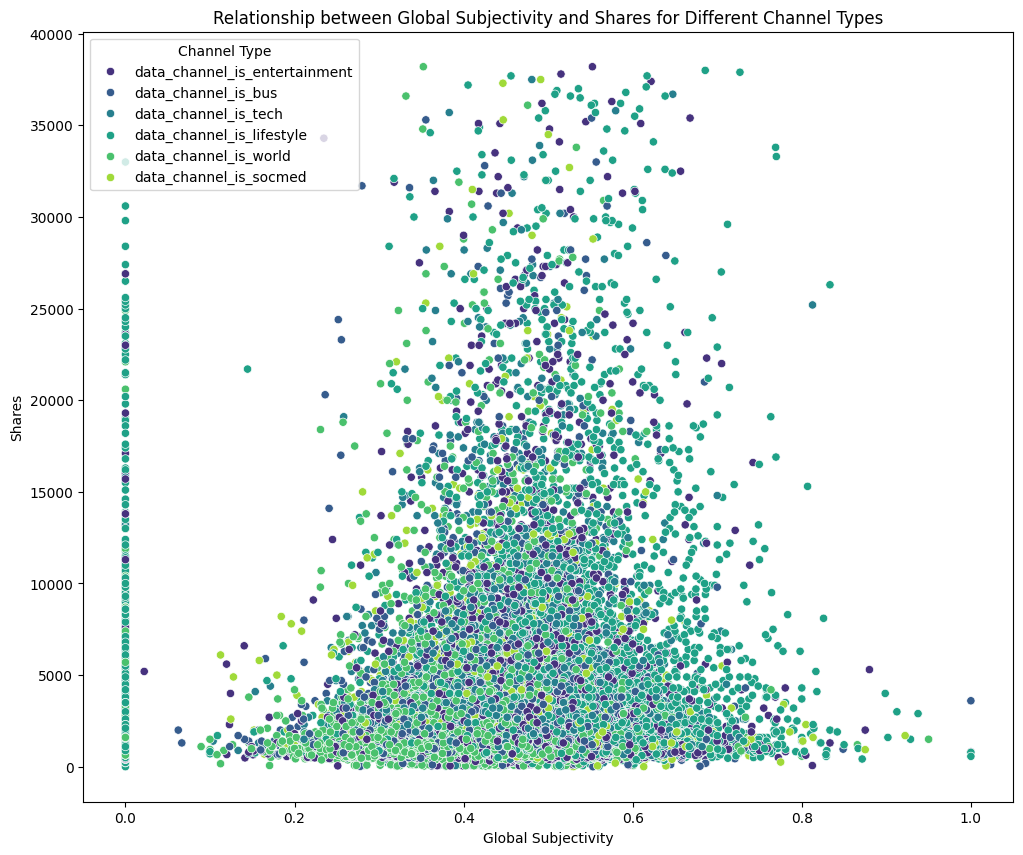

In [41]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='global_subjectivity', y='shares', hue='channel_type', data=channel_df, palette='viridis', alpha=1)
plt.title('Relationship between Global Subjectivity and Shares for Different Channel Types')
plt.xlabel('Global Subjectivity')
plt.ylabel('Shares')
plt.legend(title='Channel Type')
plt.show()

## 3. Multivariate Analysis

In [42]:
data_no_outliers.columns

Index(['url', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_imgs', 'num_videos',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'global_subjectivity', 'global_sentiment_polarity',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'z_score'],
      dtype='object')

In [43]:
data_no_outliers.shape

(39336, 30)

In [44]:
heatmap_df = data_no_outliers.drop(['url', 'z_score'], axis=1)

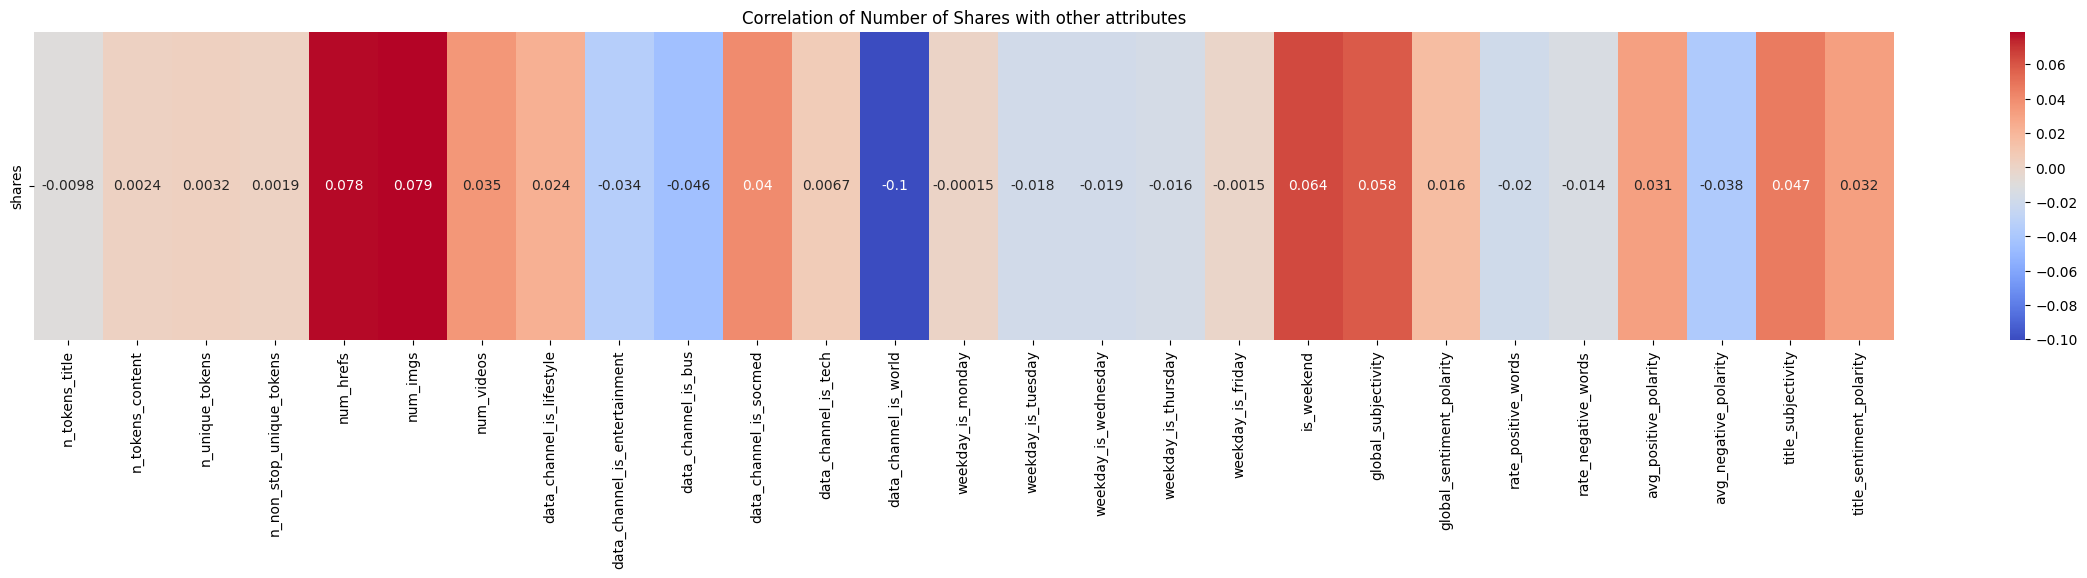

In [45]:
# heatmap generate
correlation_with_shares = heatmap_df.corr()['shares']

plt.figure(figsize=(30, 4))
sns.heatmap(correlation_with_shares.drop('shares').to_frame().T, annot=True, cmap='coolwarm')
plt.title('Correlation of Number of Shares with other attributes')
plt.show()

In [46]:
heatmap_col1 = heatmap_df.iloc[:, list(range(13)) + [-1]]
heatmap_col1.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_imgs', 'num_videos',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'shares'],
      dtype='object')

In [47]:
heatmap_col2 = heatmap_df.iloc[:, 13:]
heatmap_col2.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

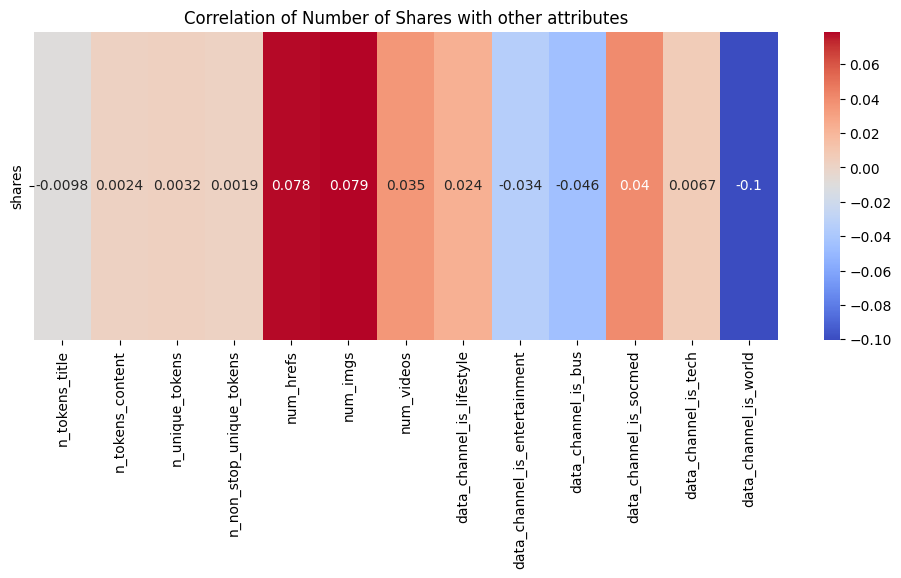

In [48]:
correlation1 = heatmap_col1.corr()['shares']

plt.figure(figsize=(12, 4))
sns.heatmap(correlation1.drop('shares').to_frame().T, annot=True, cmap='coolwarm')
plt.title('Correlation of Number of Shares with other attributes')
plt.show()

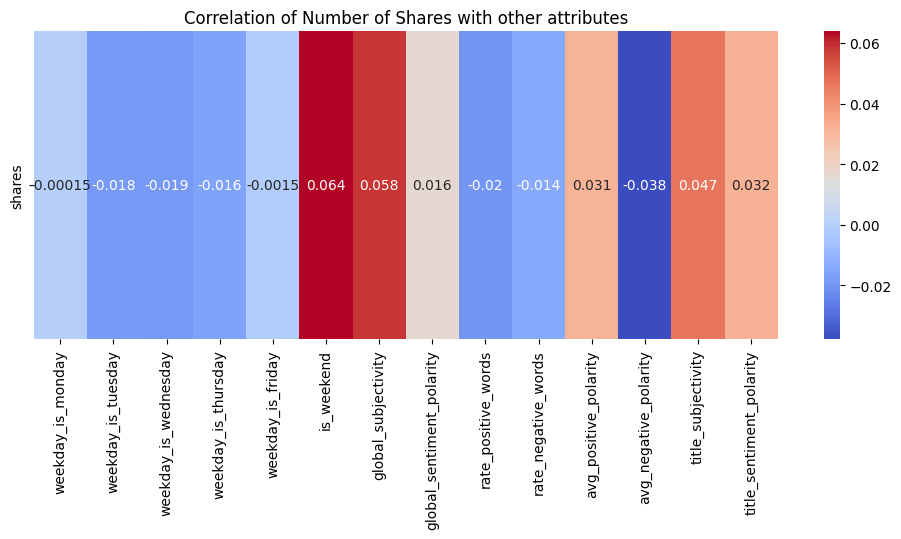

In [49]:
correlation2 = heatmap_col2.corr()['shares']

plt.figure(figsize=(12, 4))
sns.heatmap(correlation2.drop('shares').to_frame().T, annot=True, cmap='coolwarm')
plt.title('Correlation of Number of Shares with other attributes')
plt.show()

# 4. Model Evaluation

In [50]:
response = requests.get('https://drive.google.com/uc?id=1BOCPd_ifBNwogwi7DRvj5guUyH_JMIdd&export=download')
content = response.content

data = pd.read_csv(BytesIO(content))
# drop attributes
data = data.drop(columns=['timedelta', 'n_non_stop_words', 'average_token_length', 'num_keywords',
                          'global_rate_positive_words', 'global_rate_negative_words','num_self_hrefs',
                          'weekday_is_saturday', 'weekday_is_sunday',
                          'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                          'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',
                          'min_positive_polarity', 'max_positive_polarity', 'min_negative_polarity', 'max_negative_polarity','abs_title_subjectivity', 'abs_title_sentiment_polarity',
                          'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'])
data.rename(columns={' data_channel_is_entertainment': 'data_channel_is_entertainment'}, inplace=True)
data = data.drop(columns=['url'])
data.shape

(39644, 28)

In [51]:
# Handling outliers
mean = data['shares'].mean()
std = data['shares'].std()
threshold = 3
data['z_score'] = (data['shares'] - mean) / std
data_no_outliers = data[abs(data['z_score']) <= threshold]
data_no_outliers = data_no_outliers.drop(columns=['z_score'])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
y = data_no_outliers['shares']
X = data_no_outliers.drop(['shares'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [54]:
train_x.shape

(31468, 27)

## Linear Regression

In [55]:
regressor = LinearRegression()
regressor.fit(train_x, train_y)

LinearRegression()

In [56]:
y_pred = regressor.predict(test_x)
print("Liner Regression R-squared: {}".format(regressor.score(test_x, test_y)))
lin_mse = mean_squared_error(y_pred, test_y)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

Liner Regression R-squared: 0.03945907325741649
Liner Regression RMSE: 3914.7473596377986


AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

## Logistic Regression

In [57]:
x_train = train_x
y_train = train_y
x_test = test_x
y_test = test_y

In [58]:
rg = LogisticRegression(max_iter=2000)
model = rg.fit(train_x, train_y)
y_pred = model.predict(test_x)
print(mean_squared_error(test_y, y_pred, squared=False))

C:\Users\stdke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4449.5739460335


## Decision Tree

In [59]:
dt = tree.DecisionTreeRegressor(max_depth=4).fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared=False))
dt.feature_importances_

3948.159305794318


array([0.        , 0.08931265, 0.        , 0.        , 0.21021584,
       0.07130407, 0.        , 0.        , 0.15238763, 0.10301425,
       0.        , 0.        , 0.28641874, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04000753, 0.03538018,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0119591 ])

<Axes: title={'center': 'Feature Importances'}>

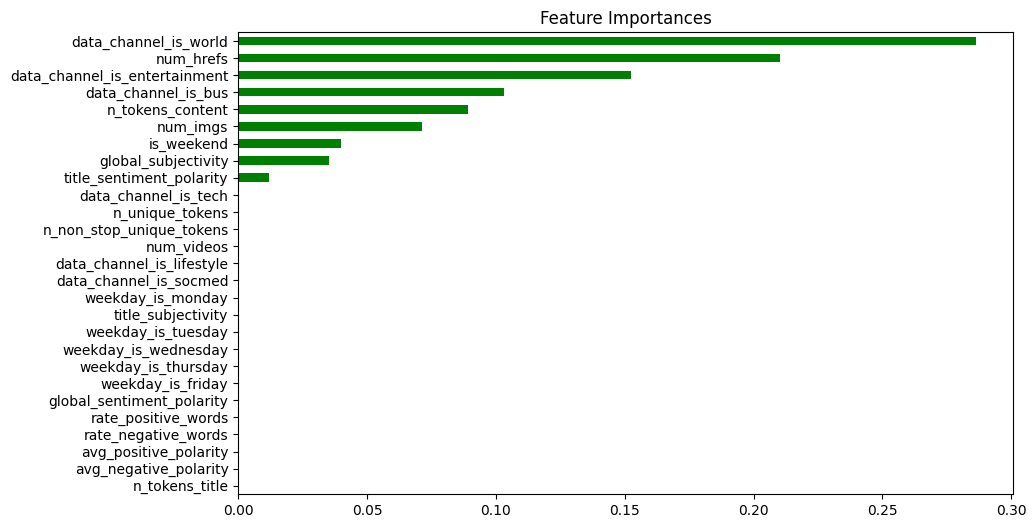

In [80]:
feature_names = [feature for feature in data_no_outliers.columns if feature not in ['shares']]
feature_importance = dt.feature_importances_
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
feat_importances = pd.Series(feature_importance, index=feature_names)
feat_importances.sort_values().plot(kind="barh", color="Green")

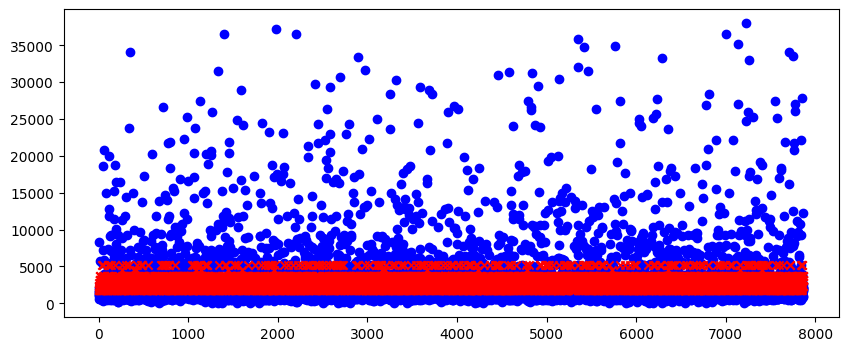

In [60]:
dt = tree.DecisionTreeRegressor(max_depth=4).fit(x_train, y_train)
y_pred = dt.predict(x_test)
indice = [i for i in range(1, len(y_test) + 1)]
plt.scatter(indice, y_test, label='true', color='blue', marker='o')
plt.scatter(indice, y_pred, label='pred', color='red', marker='x')

## Tree Ensemble: Random Forest

In [61]:
rf = RandomForestRegressor(max_depth=3, n_estimators=500).fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared=False))
rf.feature_importances_

3936.601881699456


array([6.66307240e-03, 8.54453290e-02, 1.43105312e-02, 8.87357114e-03,
       1.30802071e-01, 2.58690559e-01, 2.98745159e-02, 1.86048803e-04,
       6.73602857e-03, 2.89522056e-02, 0.00000000e+00, 0.00000000e+00,
       2.67191765e-01, 0.00000000e+00, 1.77217301e-05, 0.00000000e+00,
       3.53187818e-05, 0.00000000e+00, 6.11472316e-02, 5.75518144e-02,
       6.71050862e-03, 5.96150317e-03, 8.37489484e-03, 6.02313323e-03,
       5.91819796e-03, 5.51499497e-03, 5.01898280e-03])

<Axes: title={'center': 'Feature Importances'}>

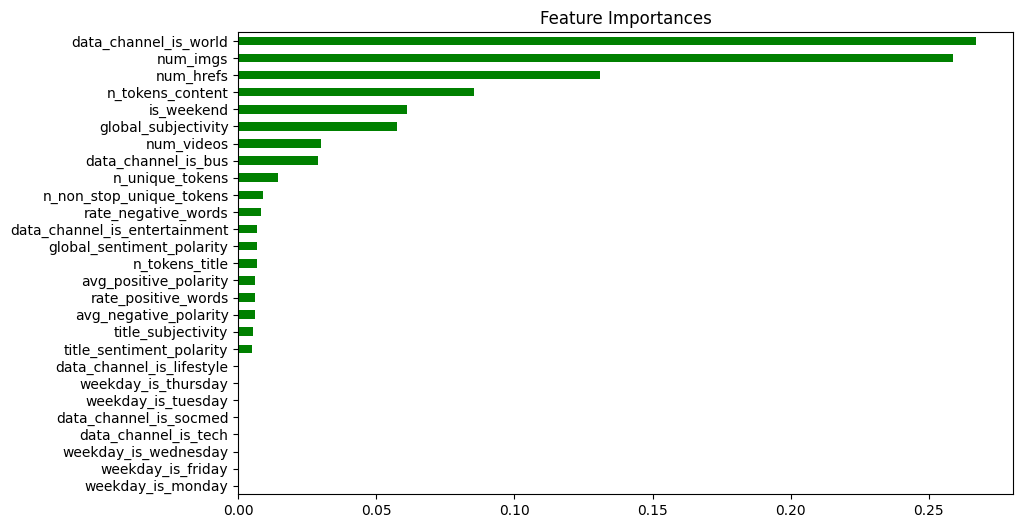

In [81]:
feature_names = [feature for feature in data_no_outliers.columns if feature not in ['shares']]
feature_importance = rf.feature_importances_
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
feat_importances = pd.Series(feature_importance, index=feature_names)
feat_importances.sort_values().plot(kind="barh", color="Green")

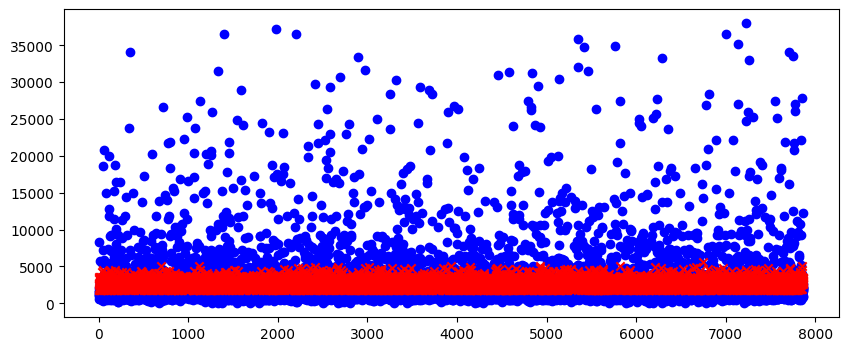

In [62]:
indice = [i for i in range(1, len(y_test) + 1)]
plt.scatter(indice, y_test, label='true', color='blue', marker='o')
plt.scatter(indice, y_pred, label='pred', color='red', marker='x')

## adaboost

In [63]:
ab = AdaBoostRegressor(n_estimators=500).fit(x_train, y_train)
y_pred = ab.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared=False))
ab.feature_importances_

4446.357713616209


array([0.03510549, 0.07326349, 0.        , 0.01587456, 0.06918619,
       0.21662628, 0.01331826, 0.        , 0.        , 0.02773852,
       0.00568202, 0.        , 0.13027747, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05421277, 0.19010911,
       0.04252549, 0.04941946, 0.01306983, 0.01625755, 0.03735366,
       0.00997985, 0.        ])

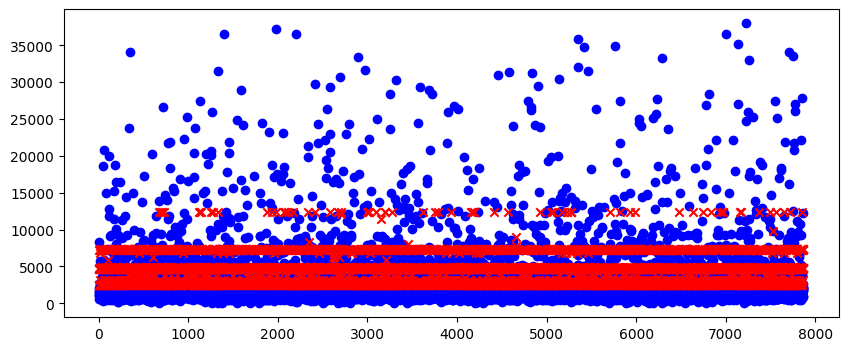

In [64]:
indice = [i for i in range(1, len(y_test) + 1)]
plt.scatter(indice, y_test, label='true', color='blue', marker='o')
plt.scatter(indice, y_pred, label='pred', color='red', marker='x')

## Tree Ensemble: Gradient Boosting Regression

In [65]:
gbreg = GradientBoostingRegressor(random_state=0)

In [66]:
# Use GridSearchCV to find the best parameter
parameters ={'n_estimators': [1, 5, 10, 50, 100, 200],
             'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
             'learning_rate': [0.1, 0.01, 0.001]}

best_gbr = GridSearchCV(estimator=gbreg, param_grid=parameters, n_jobs=1, cv=5)

In [68]:
best_gbr.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
                         'n_estimators': [1, 5, 10, 50, 100, 200]})

In [69]:
print("Best Params:", best_gbr.best_params_)

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [70]:
y_pred = best_gbr.predict(test_x)

In [71]:
print("Gradient Boosting Regressor R-squared: {}".format(best_gbr.score(test_x, test_y)))
best_gbr_rmse = np.sqrt(mean_squared_error(y_pred, test_y))
print("Gradient Boosting Regressor Regression RMSE: {}".format(best_gbr_rmse))

Gradient Boosting Regressor R-squared: 0.04411701029865056
Gradient Boosting Regressor Regression RMSE: 3905.2439609593525


Text(0, 0.5, 'Mean Test Score')

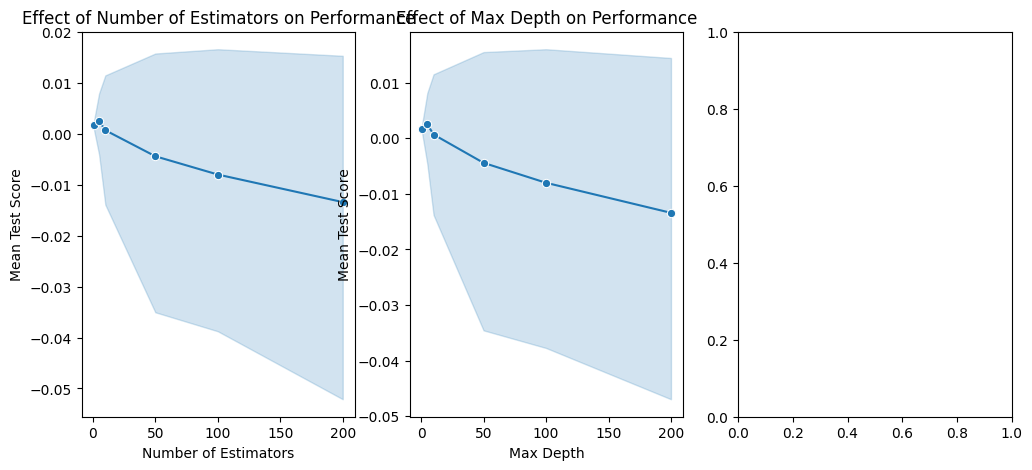

In [72]:
results = pd.DataFrame(best_gbr.cv_results_)

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
# Plot the effect of n_estimators on performance
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=results, ax=axs[0], marker='o')
axs[0].set_title('Effect of Number of Estimators on Performance')
axs[0].set_xlabel('Number of Estimators')
axs[0].set_ylabel('Mean Test Score')
# Plot the effect of max_depth on performance
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=results, ax=axs[1], marker='o')
axs[1].set_title('Effect of Max Depth on Performance')
axs[1].set_xlabel('Max Depth')
axs[1].set_ylabel('Mean Test Score')

## Analysis

<Axes: title={'center': 'Feature Importances'}>

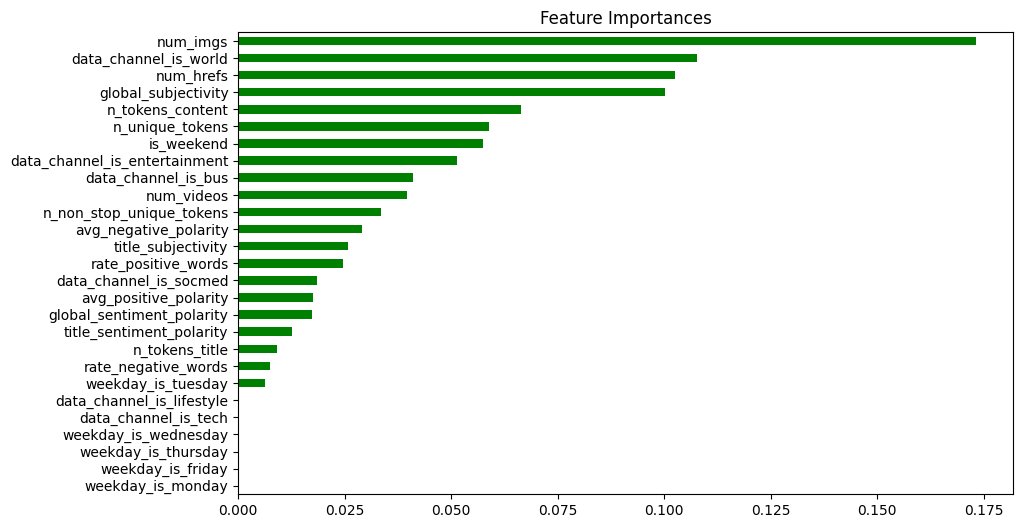

In [74]:
gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50)
gb.fit(train_x, train_y)
y_pred = best_gbr.predict(test_x)
feature_names = [feature for feature in data_no_outliers.columns if feature not in ['shares']]
feature_importance = gb.feature_importances_
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
feat_importances = pd.Series(feature_importance, index=feature_names)
feat_importances.sort_values().plot(kind="barh", color="Green")

# 5. Classification


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
import requests
from io import BytesIO

In [97]:
response = requests.get('https://drive.google.com/uc?id=1BOCPd_ifBNwogwi7DRvj5guUyH_JMIdd&export=download')
content = response.content

data = pd.read_csv(BytesIO(content))
# drop attributes
data = data.drop(columns=['timedelta', 'n_non_stop_words', 'average_token_length', 'num_keywords',
                          'global_rate_positive_words', 'global_rate_negative_words','num_self_hrefs',
                          'weekday_is_saturday', 'weekday_is_sunday',
                          'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                          'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',
                          'min_positive_polarity', 'max_positive_polarity', 'min_negative_polarity', 'max_negative_polarity','abs_title_subjectivity', 'abs_title_sentiment_polarity',
                          'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'])
data.rename(columns={' data_channel_is_entertainment': 'data_channel_is_entertainment'}, inplace=True)
data = data.drop(columns=['url'])
data.shape

(39644, 28)

In [98]:
updated_set = data.copy()

### Attributes correlation with SHARES

### Preparation for training

In [99]:
updated_set['is_popular'] = updated_set['shares'].apply(lambda x: 0 if x < 3500 else 1)

min_max_scaler = MinMaxScaler()
normalized_data = pd.DataFrame(min_max_scaler.fit_transform(updated_set.iloc[: , 1: -1]), columns=updated_set.columns[1: -1])
normalized_data['is_popular'] = updated_set['is_popular']
#oversample processing
X = normalized_data.drop(columns=['is_popular','shares'], axis=1)
y = normalized_data['is_popular']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
df_resampled['is_popular'] = y_resampled

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(normalized_data.iloc[: , : -2], normalized_data.iloc[: , -2], test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(df_resampled.iloc[: , : -1], df_resampled.iloc[: , -1], test_size=0.2, random_state=42)

In [100]:
print(len(updated_set[updated_set['shares'] < 3500]) / len(updated_set['shares']))

0.8030471193623246


### Logistic Regression

In [101]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_c, y_train_c)
y_pred =model.predict(X_test_c)

accuracy = accuracy_score(y_test_c, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test_c, y_pred)
print('Classification Report: \n')
print(report)

Accuracy: 0.617824892029839
Classification Report: 

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      6304
           1       0.63      0.59      0.61      6431

    accuracy                           0.62     12735
   macro avg       0.62      0.62      0.62     12735
weighted avg       0.62      0.62      0.62     12735



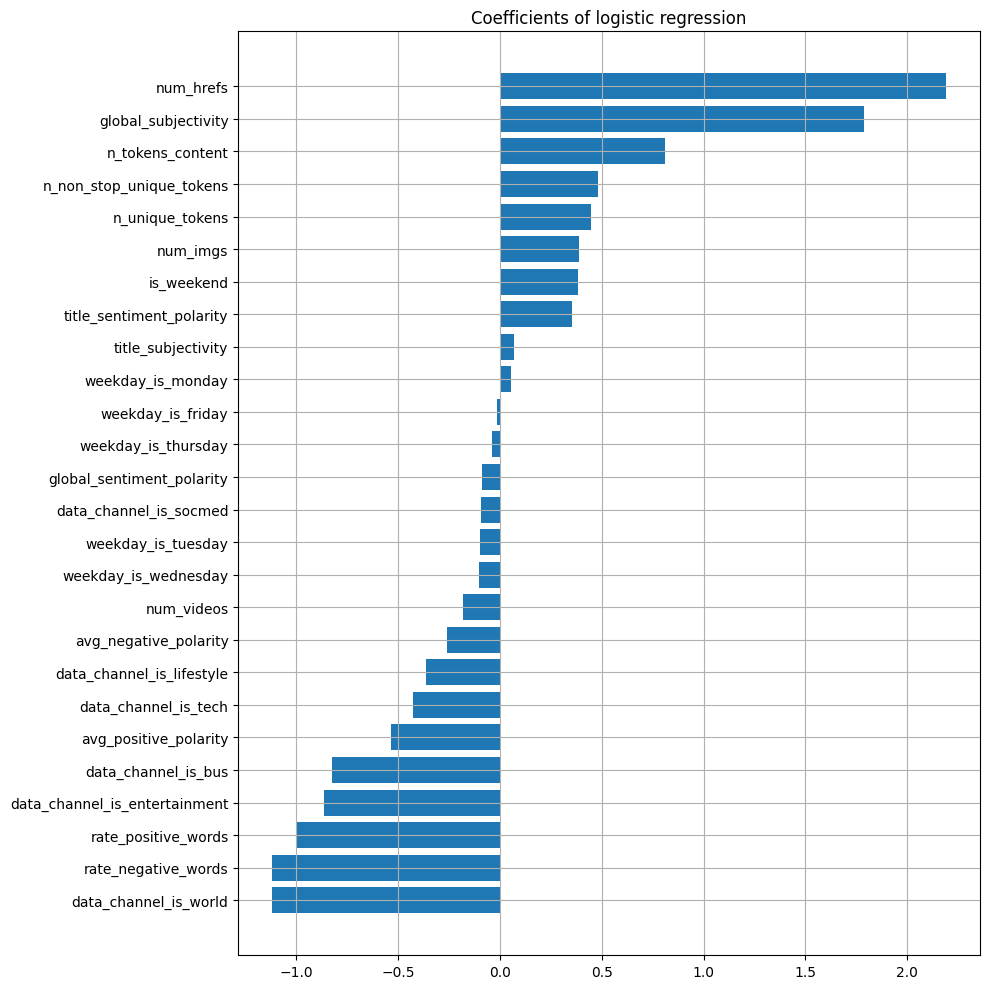

In [102]:
coefficient = model.coef_[0]
coefficient_data = pd.DataFrame(updated_set.columns[1: -2], columns=['Attributes'])
coefficient_data['Coefficients'] = coefficient
coefficient_data.sort_values(by='Coefficients', ascending=True, inplace=True)
plt.figure(figsize=(10,10))
plt.barh(coefficient_data['Attributes'], coefficient_data['Coefficients'])
plt.title('Coefficients of logistic regression')
plt.grid()
plt.tight_layout()
plt.show()

### Decision Tree

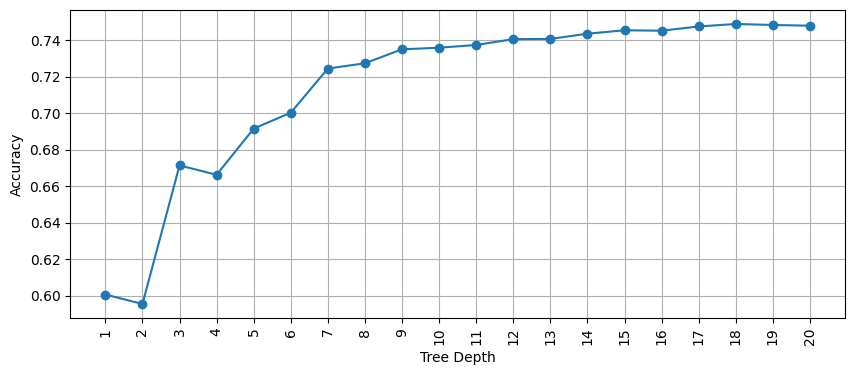

In [103]:
clf = DecisionTreeClassifier(max_depth=3)

max_depth = np.arange(1, 21)
mean_score = []

for depth in max_depth:
    clf.set_params(max_depth=depth)
    scores = cross_val_score(clf, df_resampled.iloc[: , : -1], df_resampled.iloc[: , -1], cv=5)
    mean_score.append(scores.mean())
plt.xticks(ticks=np.arange(1, 21, 1))
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.plot(max_depth, mean_score, marker='o')

In [104]:
clf.set_params(max_depth=20)

clf.fit(X_train_c, y_train_c)
y_pred = clf.predict(X_test_c)

accuracy = accuracy_score(y_test_c, y_pred)
report = classification_report(y_test_c, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Report: {report}')

Accuracy: 0.7731448763250883
Report:               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6304
           1       0.77      0.79      0.78      6431

    accuracy                           0.77     12735
   macro avg       0.77      0.77      0.77     12735
weighted avg       0.77      0.77      0.77     12735



In [105]:
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=updated_set.columns[1: -2],
    class_names=['not popular', 'popular'],
    filled=True,
    rounded=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Random Forest

In [106]:
num_tree = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
acc = []
cnt = 0;
for i in num_tree:
    clf = RandomForestClassifier(n_estimators=i, max_depth=100, random_state=42)

    clf.fit(X_train_c, y_train_c)
    y_pred = clf.predict(X_test_c)

    accuracy = accuracy_score(y_test_c, y_pred)
    report = classification_report(y_test_c, y_pred)

    acc.append(accuracy)
    print(f"{num_tree[cnt]} trees:")
    print(f'Accuracy: {accuracy}')
    print(f'Report: {report}')
    cnt = cnt + 1

10 trees:
Accuracy: 0.8258343148802513
Report:               precision    recall  f1-score   support

           0       0.79      0.89      0.83      6304
           1       0.88      0.76      0.82      6431

    accuracy                           0.83     12735
   macro avg       0.83      0.83      0.83     12735
weighted avg       0.83      0.83      0.83     12735

50 trees:
Accuracy: 0.8565371024734982
Report:               precision    recall  f1-score   support

           0       0.82      0.90      0.86      6304
           1       0.89      0.81      0.85      6431

    accuracy                           0.86     12735
   macro avg       0.86      0.86      0.86     12735
weighted avg       0.86      0.86      0.86     12735

100 trees:
Accuracy: 0.8612485276796231
Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87      6304
           1       0.90      0.82      0.86      6431

    accuracy                           0

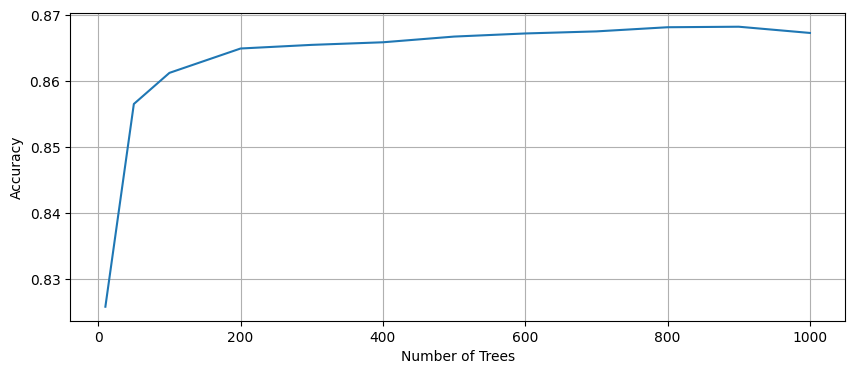

In [107]:
plt.plot(num_tree, acc)
plt.grid()
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.show()

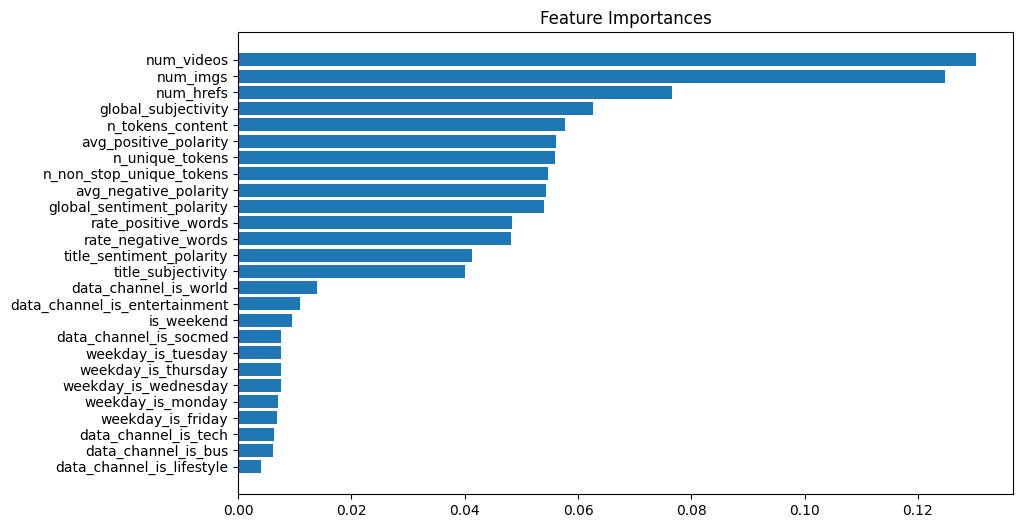

In [108]:
clf = RandomForestClassifier(n_estimators=800, max_depth=100, random_state=42)
clf.fit(X_train_c, y_train_c)

importances = clf.feature_importances_

coefficient_data = pd.DataFrame(df_resampled.columns[: -1], columns=['Attributes'])
coefficient_data['Coefficients'] = importances
coefficient_data.sort_values(by='Coefficients', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(coefficient_data['Attributes'], coefficient_data['Coefficients'])
plt.title('Feature Importances')
plt.show()